<a href="https://colab.research.google.com/github/chellshelove/FoDS_Final_Exam/blob/main/Chellshe_Love_Simrochelle_Final_Exam_Fundamentals_of_Data_Science_ODD_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your Full Name: ChellsheLove Simrochelle <br>
Student ID: 2502043040



---

# **Question No.  1 (15 points)**

Data Science is an interdisciplinary field that focuses on extracting knowledge from data sets that are typically huge in amount. There are several steps that need to be performed in Data Science, so that we can turn the raw data into a valuable insight for business. Before we build a data science solution, we need a data science pipeline, which is defined as “a set of actions which changes the raw (and confusing) data from various sources (surveys, feedbacks, list of purchases, votes, etc.), to an understandable format so that we can store it and use it for analysis.”

Please design your pipeline to process the given problem into valuable insights and explain what you are going to do in each step. 


**YOUR ANSWER:** <br>
\<Add your image and explanation here\>

In [ ]:
# importing all the necessary library
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# machine learning libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from google.colab import files

In [ ]:
# upload the csv file and filter out all the warnings
dataset = files.upload()

df = pd.read_csv("final-exam-dataset.csv")

warnings.filterwarnings("ignore")

Saving final-exam-dataset.csv to final-exam-dataset (28).csv


In [ ]:
# show the first 5 rows of the dataset
df.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,M,NaN,Y,0.0,NaN,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,NaN,0.0,NaN,Security staff,2.0,-29,0
1,1,5008819,M,Y,Y,NaN,NaN,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,NaN,0.0,NaN,0.0,Laborers,2.0,-17,0
2,2,5008820,M,Y,Y,0.0,135000.0,Commercial associate,NaN,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,M,Y,NaN,0.0,NaN,NaN,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,NaN,-8,0
4,4,5008822,M,Y,Y,0.0,135000.0,NaN,NaN,Married,...,-17778.0,-1194.0,NaN,0.0,0.0,0.0,Laborers,2.0,-22,0


In [ ]:
# show the last 5 rows of the dataset
df.tail()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
134,134,5142362,M,Y,Y,NaN,NaN,NaN,Secondary / secondary special,Married,...,-16204.0,-925.0,NaN,1.0,1.0,0.0,Drivers,NaN,-59,1
135,135,5145846,F,N,Y,1.0,256500.0,NaN,Higher education,NaN,...,-17594.0,-1315.0,1.0,0.0,1.0,NaN,Managers,3.0,-14,1
136,136,5146167,F,N,NaN,0.0,NaN,Working,Secondary / secondary special,NaN,...,-20296.0,-1770.0,1.0,NaN,0.0,NaN,Security staff,2.0,-42,1
137,137,5148735,F,Y,Y,0.0,121500.0,Working,Secondary / secondary special,Married,...,-10014.0,-1386.0,1.0,0.0,0.0,0.0,Medicine staff,NaN,-44,1
138,138,5149698,M,NaN,Y,NaN,171000.0,NaN,NaN,NaN,...,-10145.0,-107.0,1.0,0.0,0.0,0.0,Laborers,1.0,-59,1


In [ ]:
# show all column in dataset
df.columns

Index(['Unnamed: 0', 'ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'BEGIN_MONTH', 'TARGET'],
      dtype='object')

In [ ]:
# prints information about dataset
df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          116 non-null    object 
 3   FLAG_OWN_CAR         119 non-null    object 
 4   FLAG_OWN_REALTY      110 non-null    object 
 5   CNT_CHILDREN         117 non-null    float64
 6   AMT_INCOME_TOTAL     106 non-null    float64
 7   NAME_INCOME_TYPE     106 non-null    object 
 8   NAME_EDUCATION_TYPE  107 non-null    object 
 9   NAME_FAMILY_STATUS   105 non-null    object 
 10  NAME_HOUSING_TYPE    109 non-null    object 
 11  DAYS_BIRTH           120 non-null    float64
 12  DAYS_EMPLOYED        111 non-null    float64
 13  FLAG_MOBIL           110 non-null    float64
 14  FLAG_WORK_PHONE      108 non-null    float64
 15  FLAG_PHONE           115 non-null    flo

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,M,NaN,Y,0.0,NaN,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,NaN,0.0,NaN,Security staff,2.0,-29,0
1,1,5008819,M,Y,Y,NaN,NaN,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,NaN,0.0,NaN,0.0,Laborers,2.0,-17,0
2,2,5008820,M,Y,Y,0.0,135000.0,Commercial associate,NaN,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,M,Y,NaN,0.0,NaN,NaN,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,NaN,-8,0
4,4,5008822,M,Y,Y,0.0,135000.0,NaN,NaN,Married,...,-17778.0,-1194.0,NaN,0.0,0.0,0.0,Laborers,2.0,-22,0
5,5,5008823,M,Y,Y,0.0,135000.0,Commercial associate,Secondary / secondary special,NaN,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-7,0
6,6,5008824,M,Y,Y,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,NaN,-3,0
7,7,5008844,M,NaN,Y,0.0,NaN,NaN,Secondary / secondary special,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-43,0
8,8,5008846,NaN,Y,Y,0.0,112500.0,NaN,Secondary / secondary special,NaN,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,NaN,2.0,-11,0
9,9,5008847,M,Y,Y,0.0,112500.0,Commercial associate,NaN,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-46,0


# **Question No.  2 (30 points)**
Understand the data, and perform necessary data cleaning by using Python, which include the following process:
a. (5 points)<br>
Show the summary of the missing values in each column. What percentage of values are missing in the data set? <br>
b. (10 points)<br>
Apply some suitable methods to handle the missing data (please do not drop) <br>
c. (10 points)<br>
Transform data into numeric format<br>
d. (5 points)<br>
Plot the correlation values between each attribute.<br>

For each process, please show the change in your data summary (print the before-after using ```pandas.dataframe.info()``` method). 


Question No.2 (a)

In [ ]:
# returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
df.isnull()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,False,True,False,False
135,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
136,False,False,False,False,True,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False
137,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# check if there are null values
print(df.isnull().sum())

df.info()

Unnamed: 0              0
ID                      0
CODE_GENDER            23
FLAG_OWN_CAR           20
FLAG_OWN_REALTY        29
CNT_CHILDREN           22
AMT_INCOME_TOTAL       33
NAME_INCOME_TYPE       33
NAME_EDUCATION_TYPE    32
NAME_FAMILY_STATUS     34
NAME_HOUSING_TYPE      30
DAYS_BIRTH             19
DAYS_EMPLOYED          28
FLAG_MOBIL             29
FLAG_WORK_PHONE        31
FLAG_PHONE             24
FLAG_EMAIL             30
OCCUPATION_TYPE        31
CNT_FAM_MEMBERS        27
BEGIN_MONTH             0
TARGET                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          116 non-null    object 
 3   FLAG_OWN_CAR         119 non-null    object 
 4   FLAG_OWN_REALTY      110 non-nu

In [ ]:
# the percentage of the missing values in the dataset
percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

Unnamed: 0              0.00
ID                      0.00
CODE_GENDER            16.55
FLAG_OWN_CAR           14.39
FLAG_OWN_REALTY        20.86
CNT_CHILDREN           15.83
AMT_INCOME_TOTAL       23.74
NAME_INCOME_TYPE       23.74
NAME_EDUCATION_TYPE    23.02
NAME_FAMILY_STATUS     24.46
NAME_HOUSING_TYPE      21.58
DAYS_BIRTH             13.67
DAYS_EMPLOYED          20.14
FLAG_MOBIL             20.86
FLAG_WORK_PHONE        22.30
FLAG_PHONE             17.27
FLAG_EMAIL             21.58
OCCUPATION_TYPE        22.30
CNT_FAM_MEMBERS        19.42
BEGIN_MONTH             0.00
TARGET                  0.00
dtype: float64


In [ ]:
# the missing percentages sorted
missing_value_df.sort_values('percent_missing', inplace=True)

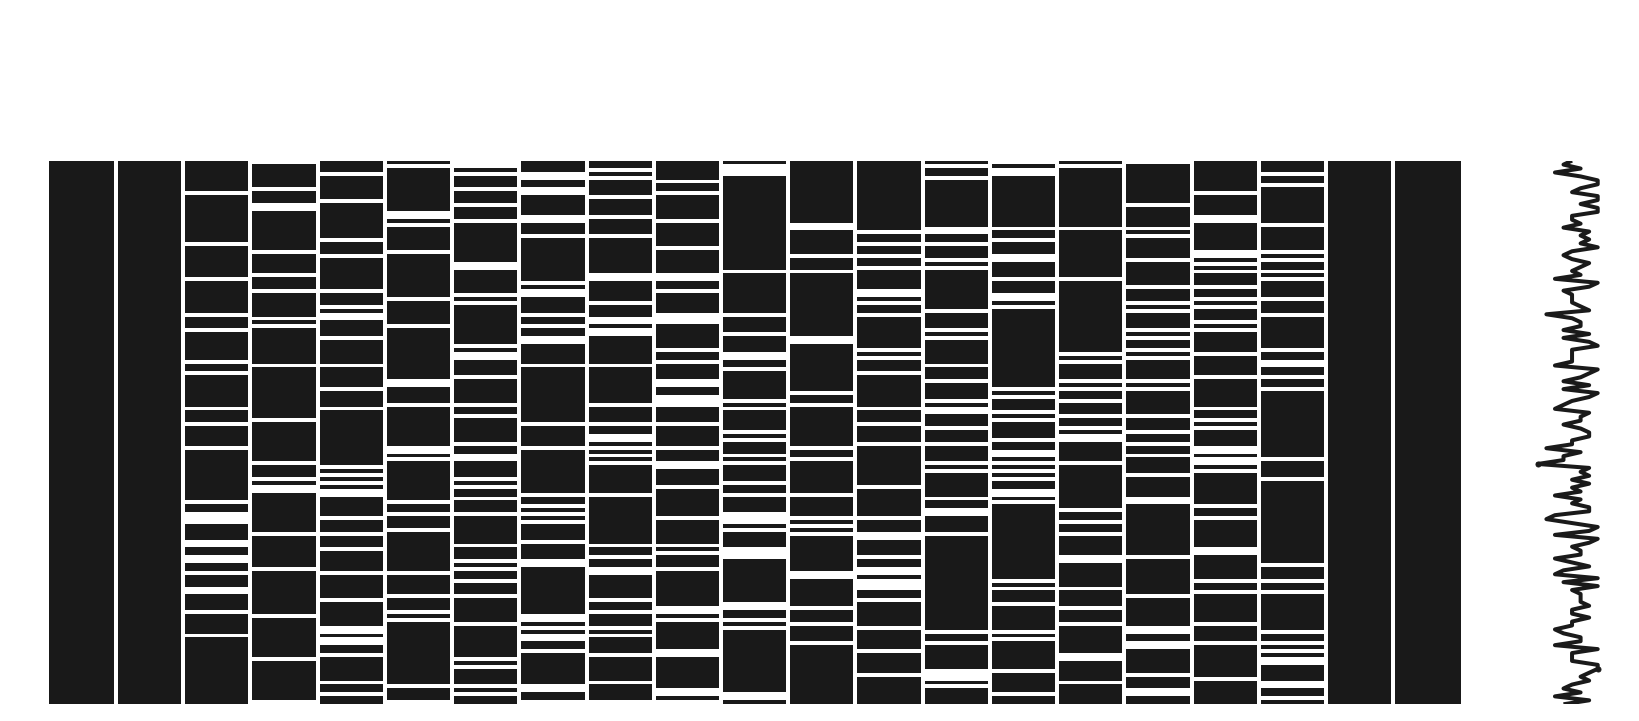

In [ ]:
# showing missing value in each 
msno.matrix(df, color="0.1")
plt.show()

In [ ]:
# before handling missing data
print(df)

     Unnamed: 0       ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             0  5008806           M          NaN               Y   
1             1  5008819           M            Y               Y   
2             2  5008820           M            Y               Y   
3             3  5008821           M            Y             NaN   
4             4  5008822           M            Y               Y   
..          ...      ...         ...          ...             ...   
134         134  5142362           M            Y               Y   
135         135  5145846           F            N               Y   
136         136  5146167           F            N             NaN   
137         137  5148735           F            Y               Y   
138         138  5149698           M          NaN               Y   

     CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0.0               NaN               Working   
1             NaN               NaN  Commercial a

Question No.2 (b)

In [ ]:
# fills the NULL values with a 0 / after handling missing data
df.fillna(0,inplace=True)
print(df)

     Unnamed: 0       ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             0  5008806           M            0               Y   
1             1  5008819           M            Y               Y   
2             2  5008820           M            Y               Y   
3             3  5008821           M            Y               0   
4             4  5008822           M            Y               Y   
..          ...      ...         ...          ...             ...   
134         134  5142362           M            Y               Y   
135         135  5145846           F            N               Y   
136         136  5146167           F            N               0   
137         137  5148735           F            Y               Y   
138         138  5149698           M            0               Y   

     CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0.0               0.0               Working   
1             0.0               0.0  Commercial a

In [ ]:
# checking data types
df.dtypes

Unnamed: 0               int64
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
BEGIN_MONTH              int64
TARGET                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          139 non-null    object 
 3   FLAG_OWN_CAR         139 non-null    object 
 4   FLAG_OWN_REALTY      139 non-null    object 
 5   CNT_CHILDREN         139 non-null    float64
 6   AMT_INCOME_TOTAL     139 non-null    float64
 7   NAME_INCOME_TYPE     139 non-null    object 
 8   NAME_EDUCATION_TYPE  139 non-null    object 
 9   NAME_FAMILY_STATUS   139 non-null    object 
 10  NAME_HOUSING_TYPE    139 non-null    object 
 11  DAYS_BIRTH           139 non-null    float64
 12  DAYS_EMPLOYED        139 non-null    float64
 13  FLAG_MOBIL           139 non-null    float64
 14  FLAG_WORK_PHONE      139 non-null    float64
 15  FLAG_PHONE           139 non-null    flo

Question No.2 (c)

In [ ]:
# changing CODE_GENDER into numeric format
df['CODE_GENDER'] = df['CODE_GENDER'].replace('M', 0)
df['CODE_GENDER'] = df['CODE_GENDER'].replace('F', 1)

print(df)

     Unnamed: 0       ID  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             0  5008806            0            0               Y   
1             1  5008819            0            Y               Y   
2             2  5008820            0            Y               Y   
3             3  5008821            0            Y               0   
4             4  5008822            0            Y               Y   
..          ...      ...          ...          ...             ...   
134         134  5142362            0            Y               Y   
135         135  5145846            1            N               Y   
136         136  5146167            1            N               0   
137         137  5148735            1            Y               Y   
138         138  5149698            0            0               Y   

     CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0.0               0.0               Working   
1             0.0               0.0  

In [ ]:
# changing FLAG_OWN_CAR into numeric format
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace('N', 0)
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace('Y', 1)

print(df)

     Unnamed: 0       ID  CODE_GENDER  FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             0  5008806            0             0               Y   
1             1  5008819            0             1               Y   
2             2  5008820            0             1               Y   
3             3  5008821            0             1               0   
4             4  5008822            0             1               Y   
..          ...      ...          ...           ...             ...   
134         134  5142362            0             1               Y   
135         135  5145846            1             0               Y   
136         136  5146167            1             0               0   
137         137  5148735            1             1               Y   
138         138  5149698            0             0               Y   

     CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0.0               0.0               Working   
1             0.0        

In [ ]:
# changing FLAG_OWN_REALTY into numeric format
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace('N', 0)
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace('Y', 1)

print(df)

     Unnamed: 0       ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0             0  5008806            0             0                1   
1             1  5008819            0             1                1   
2             2  5008820            0             1                1   
3             3  5008821            0             1                0   
4             4  5008822            0             1                1   
..          ...      ...          ...           ...              ...   
134         134  5142362            0             1                1   
135         135  5145846            1             0                1   
136         136  5146167            1             0                0   
137         137  5148735            1             1                1   
138         138  5149698            0             0                1   

     CNT_CHILDREN  AMT_INCOME_TOTAL      NAME_INCOME_TYPE  \
0             0.0               0.0               Working   
1            

Question No.2 (d)

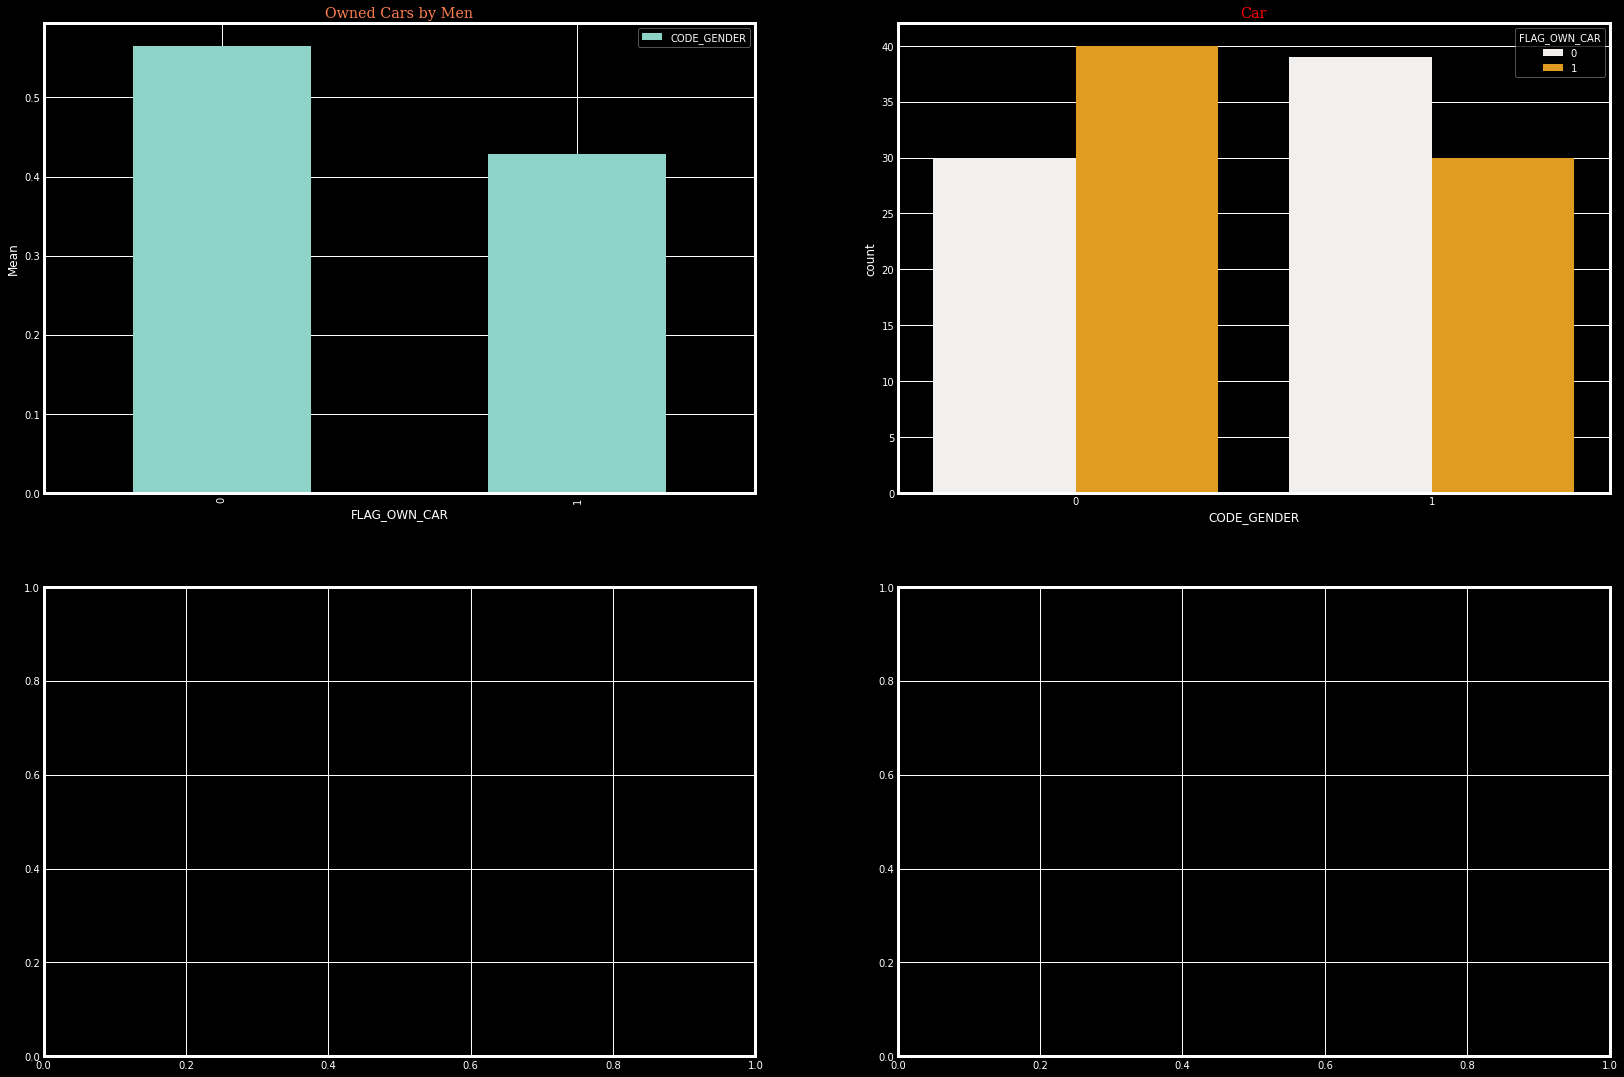

In [ ]:
plt.style.use('dark_background')
f,ax=plt.subplots(2,2,figsize=(25,19))
# axes 0
df[['CODE_GENDER','FLAG_OWN_CAR']].groupby(['FLAG_OWN_CAR']).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Owned Cars by Men', fontname='Serif', color='coral')
ax[0][0].set_ylabel('Mean')
sns.countplot('CODE_GENDER', hue='FLAG_OWN_CAR', data=df, ax=ax[0][1], color='orange')
ax[0][1].set_title('Car', fontname='Serif', color='red')
plt.show()

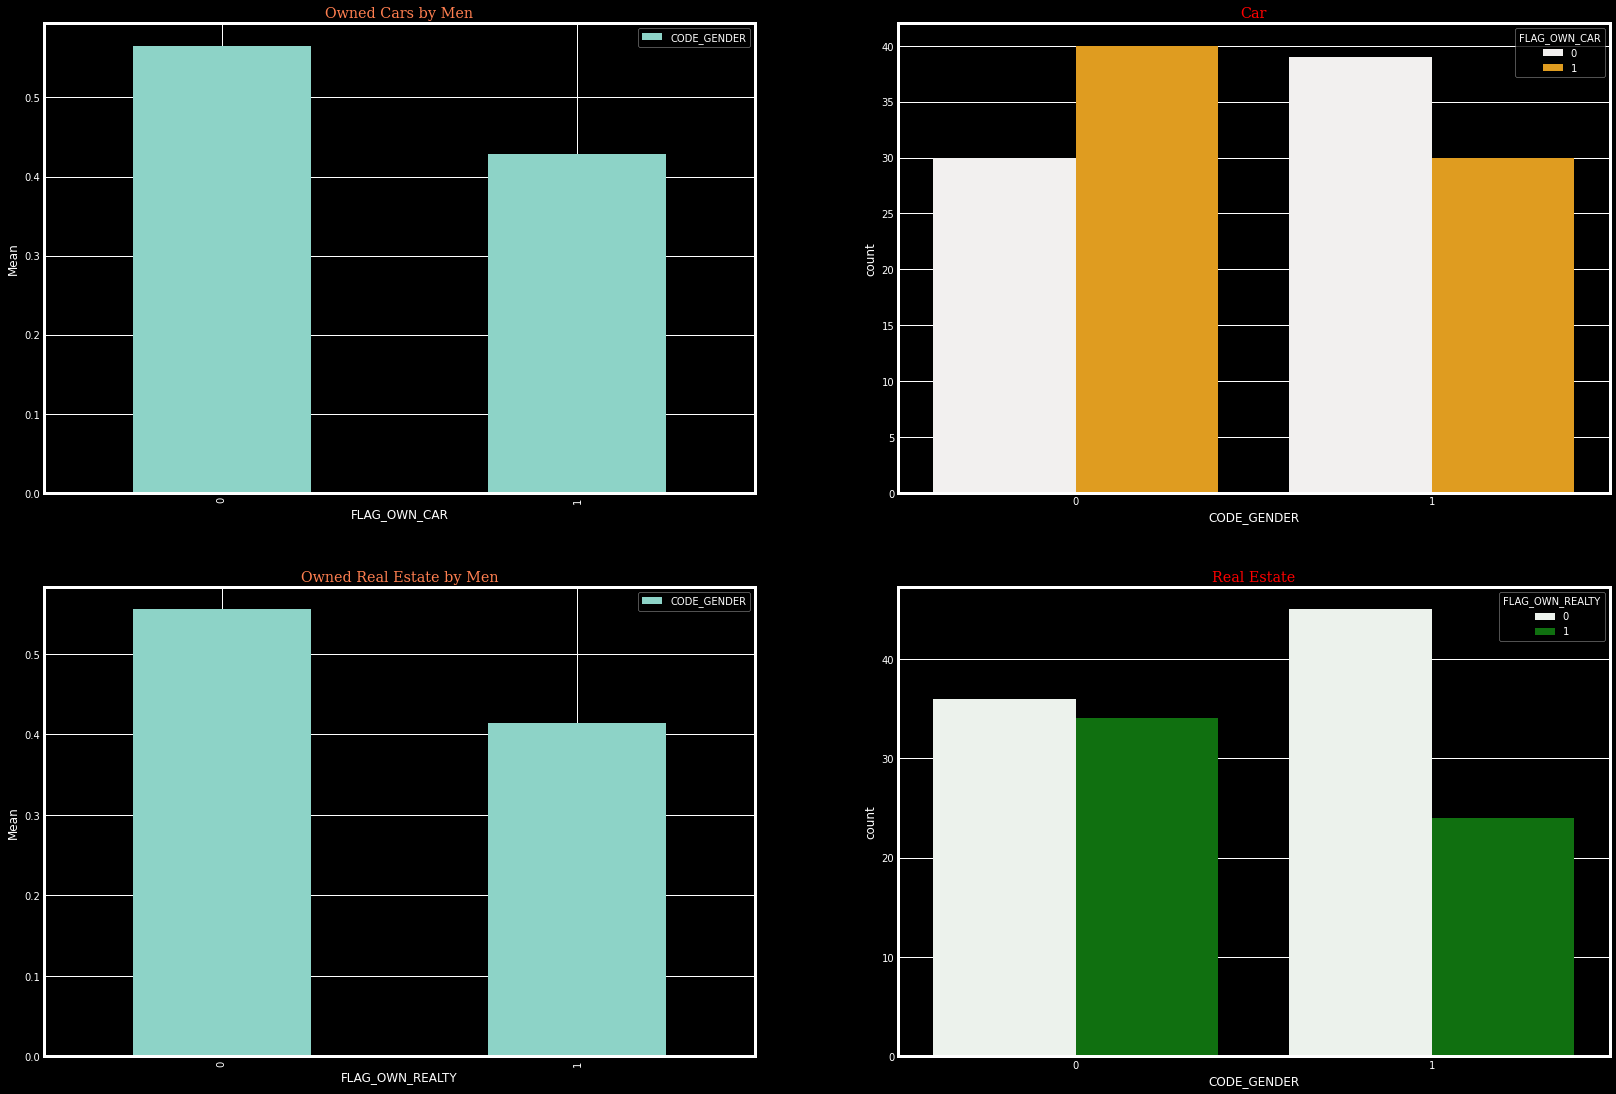

In [ ]:
plt.style.use('dark_background')
f,ax=plt.subplots(2,2,figsize=(25,19))
# axes 0
df[['CODE_GENDER','FLAG_OWN_CAR']].groupby(['FLAG_OWN_CAR']).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Owned Cars by Men', fontname='Serif', color='coral')
ax[0][0].set_ylabel('Mean')
sns.countplot('CODE_GENDER', hue='FLAG_OWN_CAR', data=df, ax=ax[0][1], color='orange')
ax[0][1].set_title('Car', fontname='Serif', color='red')
# axes 1
df[['CODE_GENDER','FLAG_OWN_REALTY']].groupby(['FLAG_OWN_REALTY']).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Owned Real Estate by Men', fontname='Serif', color='coral')
ax[1][0].set_ylabel('Mean')
sns.countplot('CODE_GENDER', hue='FLAG_OWN_REALTY', data=df, ax=ax[1][1], color='green')
ax[1][1].set_title('Real Estate', fontname='Serif', color='red')
plt.show()

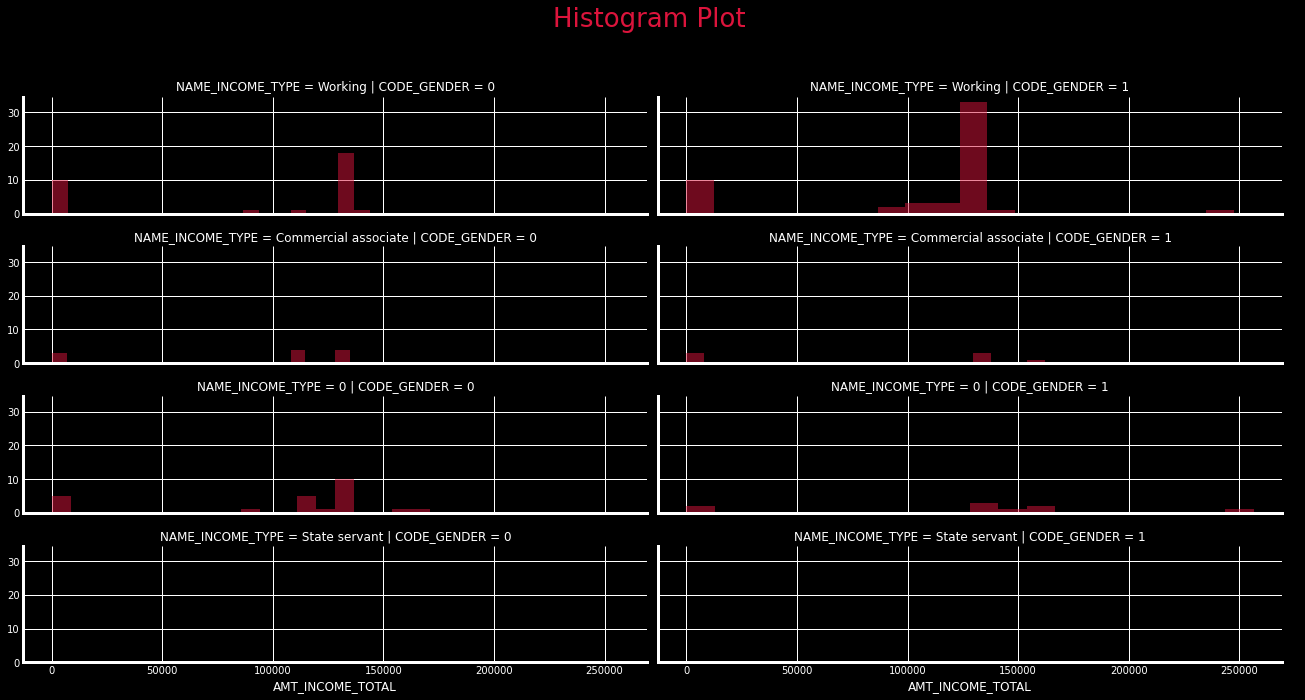

In [ ]:
g = sns.FacetGrid(df, col='CODE_GENDER', row='NAME_INCOME_TYPE', height=2.2, aspect=4.1)
g.map(plt.hist, 'AMT_INCOME_TOTAL',alpha=.5, bins=20, color='crimson')
plt.suptitle("Histogram Plot", fontsize=26, y=1.1, color='crimson')
g.add_legend()

# **Question No.  3 (35 points)**

Build and train several classification machine learning models to predict if an applicant is considered 'bad/high risk' or 'good/low risk' based on some selected features. <br>
a.	(5 points) 
Choose your features and your label.<br>
b.	(15 points) 
Divide your dataset into a separate training and testing set. Build your classification models and predict the outputs. Show your predicted outputs for the first 10 data in the test set.  <br>
c.	(15 points) 
Evaluate your model by using 10-cross validation technique. Please report and explain all the classification metrics you have learned.  


In [ ]:
# Your answer here

Question No.3 (a)

In [ ]:
X = df[['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
Y = df[['NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL']]

In [ ]:
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [ ]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

Question No.3 (b)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
clf = LinearRegression().fit(X_train, Y_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, X_test.shape)

df.info()
df[0:10]

(111, 3) (28, 3) (111, 2) (28, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          139 non-null    int64  
 3   FLAG_OWN_CAR         139 non-null    int64  
 4   FLAG_OWN_REALTY      139 non-null    int64  
 5   CNT_CHILDREN         139 non-null    float64
 6   AMT_INCOME_TOTAL     139 non-null    float64
 7   NAME_INCOME_TYPE     139 non-null    object 
 8   NAME_EDUCATION_TYPE  139 non-null    object 
 9   NAME_FAMILY_STATUS   139 non-null    object 
 10  NAME_HOUSING_TYPE    139 non-null    object 
 11  DAYS_BIRTH           139 non-null    float64
 12  DAYS_EMPLOYED        139 non-null    float64
 13  FLAG_MOBIL           139 non-null    float64
 14  FLAG_WORK_PHONE      139 non-null    float64
 15  FLAG_P

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,0,0,1,0.0,0.0,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-29,0
1,1,5008819,0,1,1,0.0,0.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-17,0
2,2,5008820,0,1,1,0.0,135000.0,Commercial associate,0,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,0,1,0,0.0,0.0,0,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-8,0
4,4,5008822,0,1,1,0.0,135000.0,0,0,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-22,0
5,5,5008823,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,0,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-7,0
6,6,5008824,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-3,0
7,7,5008844,0,0,1,0.0,0.0,0,Secondary / secondary special,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-43,0
8,8,5008846,0,1,1,0.0,112500.0,0,Secondary / secondary special,0,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,0,2.0,-11,0
9,9,5008847,0,1,1,0.0,112500.0,Commercial associate,0,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-46,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, Y_train)
reg.predict(X_test)

df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          139 non-null    int64  
 3   FLAG_OWN_CAR         139 non-null    int64  
 4   FLAG_OWN_REALTY      139 non-null    int64  
 5   CNT_CHILDREN         139 non-null    float64
 6   AMT_INCOME_TOTAL     139 non-null    float64
 7   NAME_INCOME_TYPE     139 non-null    object 
 8   NAME_EDUCATION_TYPE  139 non-null    object 
 9   NAME_FAMILY_STATUS   139 non-null    object 
 10  NAME_HOUSING_TYPE    139 non-null    object 
 11  DAYS_BIRTH           139 non-null    float64
 12  DAYS_EMPLOYED        139 non-null    float64
 13  FLAG_MOBIL           139 non-null    float64
 14  FLAG_WORK_PHONE      139 non-null    float64
 15  FLAG_PHONE           139 non-null    flo

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,0,0,1,0.0,0.0,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-29,0
1,1,5008819,0,1,1,0.0,0.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-17,0
2,2,5008820,0,1,1,0.0,135000.0,Commercial associate,0,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,0,1,0,0.0,0.0,0,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-8,0
4,4,5008822,0,1,1,0.0,135000.0,0,0,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-22,0
5,5,5008823,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,0,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-7,0
6,6,5008824,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-3,0
7,7,5008844,0,0,1,0.0,0.0,0,Secondary / secondary special,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-43,0
8,8,5008846,0,1,1,0.0,112500.0,0,Secondary / secondary special,0,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,0,2.0,-11,0
9,9,5008847,0,1,1,0.0,112500.0,Commercial associate,0,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-46,0


In [ ]:
# automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric to so
reg.score(X_test, Y_test)

0.4279789068997638

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, Y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

df.info()
df[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           139 non-null    int64  
 1   ID                   139 non-null    int64  
 2   CODE_GENDER          139 non-null    int64  
 3   FLAG_OWN_CAR         139 non-null    int64  
 4   FLAG_OWN_REALTY      139 non-null    int64  
 5   CNT_CHILDREN         139 non-null    float64
 6   AMT_INCOME_TOTAL     139 non-null    float64
 7   NAME_INCOME_TYPE     139 non-null    object 
 8   NAME_EDUCATION_TYPE  139 non-null    object 
 9   NAME_FAMILY_STATUS   139 non-null    object 
 10  NAME_HOUSING_TYPE    139 non-null    object 
 11  DAYS_BIRTH           139 non-null    float64
 12  DAYS_EMPLOYED        139 non-null    float64
 13  FLAG_MOBIL           139 non-null    float64
 14  FLAG_WORK_PHONE      139 non-null    float64
 15  FLAG_PHONE           139 non-null    flo

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,0,0,1,0.0,0.0,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-29,0
1,1,5008819,0,1,1,0.0,0.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-17,0
2,2,5008820,0,1,1,0.0,135000.0,Commercial associate,0,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,0,1,0,0.0,0.0,0,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-8,0
4,4,5008822,0,1,1,0.0,135000.0,0,0,Married,...,-17778.0,-1194.0,0.0,0.0,0.0,0.0,Laborers,2.0,-22,0
5,5,5008823,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,0,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,2.0,-7,0
6,6,5008824,0,1,1,0.0,135000.0,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,0.0,0.0,0.0,Laborers,0.0,-3,0
7,7,5008844,0,0,1,0.0,0.0,0,Secondary / secondary special,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-43,0
8,8,5008846,0,1,1,0.0,112500.0,0,Secondary / secondary special,0,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,0,2.0,-11,0
9,9,5008847,0,1,1,0.0,112500.0,Commercial associate,0,Married,...,-20502.0,-4450.0,1.0,0.0,1.0,0.0,Drivers,2.0,-46,0


In [ ]:
best_fit.score(X_test, Y_test)

0.4279789068997638

In [ ]:
# Training data
df_train = pd.read_csv('final-exam-dataset.csv')
print('Training data shape: ', df_train.shape)
df_train.head()

Training data shape:  (139, 21)


,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,M,NaN,Y,0.0,NaN,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,NaN,0.0,NaN,Security staff,2.0,-29,0
1,1,5008819,M,Y,Y,NaN,NaN,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,NaN,0.0,NaN,0.0,Laborers,2.0,-17,0
2,2,5008820,M,Y,Y,0.0,135000.0,Commercial associate,NaN,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,M,Y,NaN,0.0,NaN,NaN,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,NaN,-8,0
4,4,5008822,M,Y,Y,0.0,135000.0,NaN,NaN,Married,...,-17778.0,-1194.0,NaN,0.0,0.0,0.0,Laborers,2.0,-22,0


In [ ]:
# Testing data features
df_test = pd.read_csv('final-exam-dataset.csv')
print('Testing data shape: ', df_test.shape)
df_test.head()

Testing data shape:  (139, 21)


,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BEGIN_MONTH,TARGET
0,0,5008806,M,NaN,Y,0.0,NaN,Working,Secondary / secondary special,Married,...,-21474.0,-1134.0,1.0,NaN,0.0,NaN,Security staff,2.0,-29,0
1,1,5008819,M,Y,Y,NaN,NaN,Commercial associate,Secondary / secondary special,Married,...,-17778.0,-1194.0,NaN,0.0,NaN,0.0,Laborers,2.0,-17,0
2,2,5008820,M,Y,Y,0.0,135000.0,Commercial associate,NaN,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,2.0,-16,0
3,3,5008821,M,Y,NaN,0.0,NaN,NaN,Secondary / secondary special,Married,...,-17778.0,-1194.0,1.0,NaN,0.0,0.0,Laborers,NaN,-8,0
4,4,5008822,M,Y,Y,0.0,135000.0,NaN,NaN,Married,...,-17778.0,-1194.0,NaN,0.0,0.0,0.0,Laborers,2.0,-22,0


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [ ]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (139, 48)
Testing Features shape:  (139, 48)


In [ ]:
train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (139, 48)
Testing Features shape:  (139, 48)


Question No.3 (c)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, Y, cv=10)
print(scores)

[nan nan nan nan nan nan nan nan nan nan]


# **Question No.  4 (20 points)**

Network analysis in Data Science can also detect pattern in the dataset. Please explore the given dataset by implementing Network Analysis technique using NetworkX in Python (read the documentation here: https://networkx.org/documentation/stable/index.html)

a. (5 points) Select the source and target columns from the dataset to be analyzed <br>
b. (5 points) Draw the network graph <br>
c. (10 points) Show your analysis on the centrality measurements


Question No.4 (a)

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

In [ ]:
dataset = files.upload()

df = pd.read_csv("book.csv")

warnings.filterwarnings("ignore")

# pick only important weights (hard threshold)
df = df.loc[df['weight']>10, :]
df

Saving book.csv to book (3).csv


,Source,Target,Type,weight,book
18,Aemon-Targaryen-(Maester-Aemon),Clydas,Undirected,16,3
21,Aemon-Targaryen-(Maester-Aemon),Donal-Noye,Undirected,11,3
27,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,36,3
32,Aemon-Targaryen-(Maester-Aemon),Samwell-Tarly,Undirected,32,3
37,Aerys-II-Targaryen,Jaime-Lannister,Undirected,22,3
...,...,...,...,...,...
983,Shae,Varys,Undirected,11,3
990,Stannis-Baratheon,Tywin-Lannister,Undirected,15,3
999,Tormund,Ygritte,Undirected,11,3
1001,Tyrion-Lannister,Tywin-Lannister,Undirected,44,3


In [ ]:
# import
import networkx as nx
# load pandas df as networkx graph
G = nx.from_pandas_edgelist(df, 
                            source='Source', 
                            target='Target', 
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 117
No of connections: 195


Question No.4 (b)

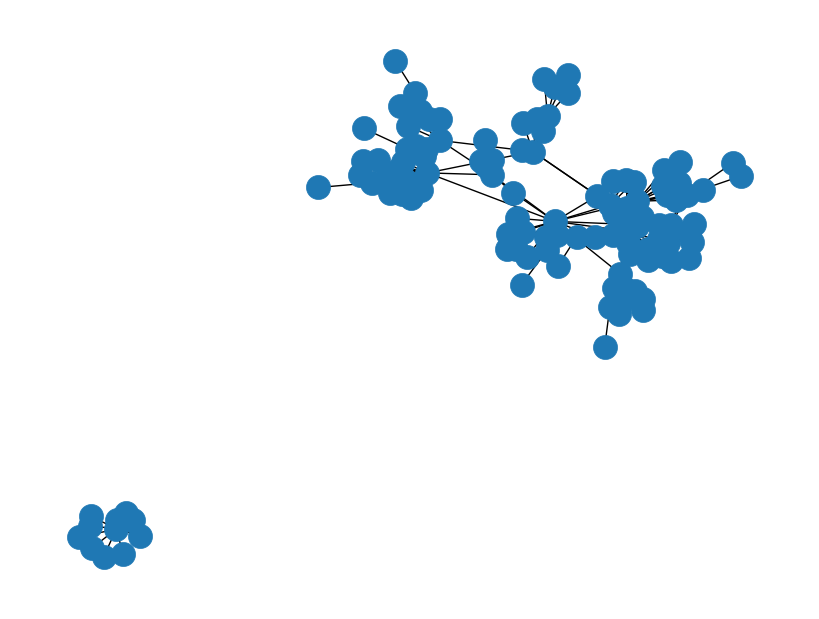

In [ ]:
# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 0

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

In [ ]:
! pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True)
# load the networkx graph
net.from_nx(G)
# show
net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Question No.4 (c)

In [ ]:
from inspect import getmembers
for x in getmembers(nx):
    if 'draw' in x[0]:
        print(x)

('draw', <function draw at 0x7f60b4d3eee0>)
('draw_circular', <function draw_circular at 0x7f60b4d5d5e0>)
('draw_kamada_kawai', <function draw_kamada_kawai at 0x7f60b4d5d670>)
('draw_networkx', <function draw_networkx at 0x7f60b4d5d310>)
('draw_networkx_edge_labels', <function draw_networkx_edge_labels at 0x7f60b4d5d550>)
('draw_networkx_edges', <function draw_networkx_edges at 0x7f60b4d5d430>)
('draw_networkx_labels', <function draw_networkx_labels at 0x7f60b4d5d4c0>)
('draw_networkx_nodes', <function draw_networkx_nodes at 0x7f60b4d5d3a0>)
('draw_planar', <function draw_planar at 0x7f60b4d5d940>)
('draw_random', <function draw_random at 0x7f60b4d5d700>)
('draw_shell', <function draw_shell at 0x7f60b4d5d8b0>)
('draw_spectral', <function draw_spectral at 0x7f60b4d5d790>)
('draw_spring', <function draw_spring at 0x7f60b4d5d820>)
('drawing', <module 'networkx.drawing' from '/usr/local/lib/python3.8/dist-packages/networkx/drawing/__init__.py'>)
('planar_drawing', <module 'networkx.algorit